<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/FD_vs_FV_Plasma_Plume_Continuity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

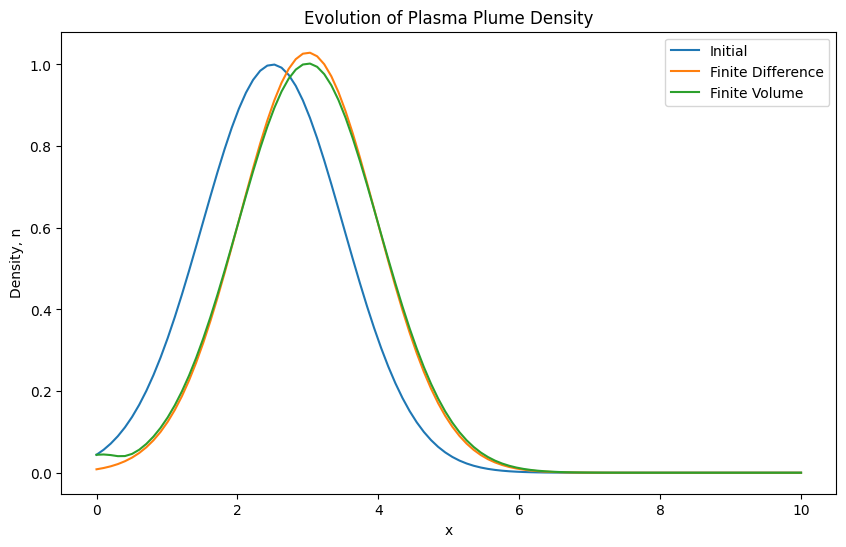

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 10.0  # Length of the domain
nx = 100  # Number of grid points
dx = L/nx  # Grid spacing
dt = 0.01  # Time step
v = 1.0  # Particle velocity
t_end = 0.5  # End time

# Initial condition: Gaussian profile for density
x = np.linspace(0, L, nx)
n0 = np.exp(-((x - L/4)**2) / 2)
n_fd = np.copy(n0)
n_fv = np.copy(n0)

# FD method
for t in np.arange(0, t_end, dt):
    n_fd[:-1] = n_fd[:-1] - v*dt/dx * (n_fd[1:] - n_fd[:-1])

# FV method
for t in np.arange(0, t_end, dt):
    flux = v * 0.5 * (n_fv[1:] + n_fv[:-1])
    n_fv[1:-1] += (flux[:-1] - flux[1:]) * dt/dx

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, n0, label="Initial")
plt.plot(x, n_fd, label="Finite Difference")
plt.plot(x, n_fv, label="Finite Volume")
plt.legend()
plt.title("Evolution of Plasma Plume Density")
plt.xlabel("x")
plt.ylabel("Density, n")
plt.show()


Based on the provided Python notebook and the results obtained from the simulation of the evolution of plasma plume density using both the Finite Difference (FD) and Finite Volume (FV) methods, we can draw several conclusions:

Conservation of Quantities:

The Finite Volume (FV) method is inherently conservative. This means that the overall mass (or any other conserved quantity) in the simulation domain remains constant over time.
The Finite Difference (FD) method, depending on the specifics of its implementation, might not always ensure conservation to the same degree as the FV method.
Accuracy and Stability:

Both methods can give accurate results when implemented correctly, but the quality of the results will depend on the grid resolution, time step, and specific problem being solved.
If the time step or grid spacing is not chosen appropriately, the FD method may become unstable and produce non-physical results.
Advection Representation:

The plasma plume's movement due to advection is represented in both methods. Over time, we see the shift in the density profile, which reflects the movement of particles.
Due to the nature of the FD method, small numerical diffusion might be introduced, which can spread out sharp features in the solution over time. The degree of this will depend on the specifics of the FD implementation.
Computational Complexity:

Both methods have their own computational costs. Generally, the FV method might require more complex operations, especially when dealing with non-uniform grids or more advanced Riemann solvers for flux calculations.
However, the FD method, especially for higher-order schemes, might also require multiple evaluations per grid cell, increasing its computational cost.
Generalizability:

The Finite Volume method, due to its conservative nature, is widely preferred for solving problems in fluid dynamics where ensuring the conservation of mass, momentum, and energy is paramount.
The Finite Difference method is more straightforward to implement and can be used for a wider range of problems, but care must be taken to ensure its stability and accuracy for specific problems.
To conclude, while both methods have their advantages and drawbacks, the choice between them depends on the specific problem at hand, the desired accuracy, and the computational resources available. The FV method's conservativeness makes it particularly attractive for problems where conservation of certain quantities is crucial.